## Predict the column labeled “target” using the numerical (numXX) and categorical attributes (catXX) as input variables. Accuracy should be measured using Mean Absolute Error (MAE).

### import libraries, read in data

In [153]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn import metrics
from sklearn import tree

train = pd.read_csv('MLProjectData.csv')
test = pd.read_csv('testData.csv')
 
train.head(5)

#cat1-cat2 have 1 letter values, and cat3-cat26 true/false

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,target
0,1424.241,15.70,-1.930008,-0.005399,-0.014426,-0.017944,0.011322,15.22,13.77,13.96,...,False,True,False,False,False,False,False,False,False,21.639999
1,983.787,15.59,0.190003,-0.000129,0.002850,0.017414,0.033371,15.15,15.54,16.64,...,False,False,False,False,False,False,False,False,False,19.919998
2,105.075,16.32,0.809998,0.000752,0.004340,0.025135,0.007954,16.23,16.71,17.44,...,False,False,False,False,False,False,False,False,False,21.150001
3,356.126,28.29,-1.409996,-0.011557,-0.020185,0.003352,-0.047518,26.66,26.24,28.18,...,False,False,False,False,False,False,False,False,False,19.360001
4,772.041,11.49,0.079987,0.001576,0.000724,0.025519,0.033136,11.76,11.97,10.74,...,False,False,False,False,False,False,False,False,False,21.400009


### Exploratory Analysis on Test data

In [134]:
train.cat1.value_counts()

C    1303
B    1303
D    1279
E    1271
A    1194
Name: cat1, dtype: int64

In [128]:
train.cat2.value_counts()

F    557
H    554
J    550
E    550
C    547
L    529
G    529
D    527
K    510
A    509
I    508
B    480
Name: cat2, dtype: int64

In [112]:
train.shape

(6350, 86)

In [113]:
train.describe(include='all')

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,target
count,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,...,6350,6350,6350,6350,6350,6350,6350,6350,6350,6350.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6281,6131,6070,6100,6156,6307,6322,6192,6281,NaN
mean,849.859489,19.424687,0.035514,0.000350,0.000692,0.002359,0.004674,19.423997,19.423383,19.422728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.035933
std,1000.217417,8.141230,1.378046,0.011589,0.015842,0.026975,0.036410,8.141693,8.142129,8.142565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.419549
min,0.052000,9.140000,-15.120010,-0.098448,-0.133555,-0.237463,-0.270464,9.140000,9.140000,9.140000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.479981
25%,68.644250,13.420000,-0.529998,-0.004574,-0.006676,-0.010854,-0.012989,13.420000,13.420000,13.420000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.453096
50%,558.720000,17.540000,0.079990,0.000598,0.001327,0.004094,0.007847,17.540000,17.540000,17.540000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.062500
75%,1250.553750,23.010000,0.639999,0.005726,0.008740,0.017024,0.025125,23.010000,23.010000,23.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.680000


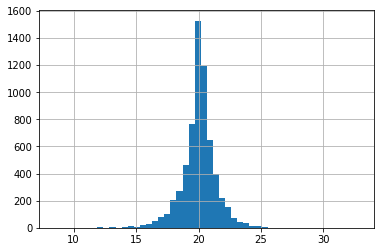

In [114]:
train.target.hist(bins=50)

In [115]:
correlation = train.corr()

#only showing first 5 rows... huge table
correlation.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,target
num1,1.000000,0.465177,-0.142451,-0.075191,-0.131312,-0.213898,-0.248453,0.450779,0.433119,0.420588,...,0.013368,-0.009497,-0.025286,0.001699,-0.012005,0.004642,0.030804,-0.022742,0.010244,0.005436
num2,0.465177,1.000000,-0.128803,-0.117020,-0.161465,-0.266506,-0.342047,0.981419,0.966600,0.954744,...,0.002065,0.003503,-0.005701,0.010139,0.007934,-0.000682,0.026011,-0.016250,-0.002589,0.025758
num3,-0.142451,-0.128803,1.000000,0.608561,0.741593,0.344835,0.259190,-0.022242,0.036942,0.017616,...,-0.054537,-0.014523,0.011788,0.038073,-0.011654,0.008330,-0.032526,0.012970,0.006455,-0.065375
num4,-0.075191,-0.117020,0.608561,1.000000,0.681963,0.348641,0.265711,0.036679,0.025095,0.015130,...,0.003118,-0.028739,0.007225,0.023784,-0.003883,0.016144,-0.030083,0.021089,0.000801,-0.054563
num5,-0.131312,-0.161465,0.741593,0.681963,1.000000,0.492185,0.371134,-0.060453,0.043802,0.028334,...,-0.015905,-0.020859,0.010653,0.027567,-0.021285,0.009510,-0.030499,0.003840,0.002821,-0.077160


In [77]:
#hideous heatmap...

#from pylab import rcParams
#rcParams['figure.figsize'] = 20, 15
#sns.heatmap(train.corr())

### Build a Decision Tree

#### issue: need to factorize categorical

In [ ]:
#tried loop to convert true/false to 1/0 ... did not work

#tf_cols = ['cat3', 'cat4','cat5', 'cat6','cat7', 'cat8','cat9', 'cat10','cat11', 'cat12',
#            'cat13', 'cat14','cat15', 'cat16','cat17', 'cat18','cat19', 'cat20','cat21', 'cat22','cat23', 'cat24',
#            'cat25', 'cat26']

#for c in tf_cols:
#    train[c] = train[c].map({'False': 0, 'True': 1})

#train.head()

In [157]:
#doing this the dumb way :/
#will want to check and make sure this is how to deal with categorical variables. feels off

train['cat1'] = train.cat1.factorize()[0]
train['cat2'] = train.cat2.factorize()[0]
train['cat3'] = train.cat3.factorize()[0]
train['cat4'] = train.cat4.factorize()[0]
train['cat5'] = train.cat5.factorize()[0]
train['cat6'] = train.cat6.factorize()[0]
train['cat7'] = train.cat7.factorize()[0]
train['cat8'] = train.cat8.factorize()[0]
train['cat9'] = train.cat9.factorize()[0]
train['cat10'] = train.cat10.factorize()[0]
train['cat11'] = train.cat11.factorize()[0]
train['cat12'] = train.cat12.factorize()[0]
train['cat13'] = train.cat13.factorize()[0]
train['cat14'] = train.cat14.factorize()[0]
train['cat15'] = train.cat15.factorize()[0]
train['cat16'] = train.cat16.factorize()[0]
train['cat17'] = train.cat17.factorize()[0]
train['cat18'] = train.cat18.factorize()[0]
train['cat19'] = train.cat19.factorize()[0]
train['cat20'] = train.cat20.factorize()[0]
train['cat21'] = train.cat21.factorize()[0]
train['cat22'] = train.cat22.factorize()[0]
train['cat23'] = train.cat23.factorize()[0]
train['cat24'] = train.cat24.factorize()[0]
train['cat25'] = train.cat25.factorize()[0]
train['cat26'] = train.cat26.factorize()[0]

In [158]:
x = train.drop('target', axis=1)
y = train.target

In [159]:
model = tree.DecisionTreeRegressor()

In [161]:
model.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [176]:
# List of values to try for max_depth:
max_depth_range = range(1, 25)

# List to store the average MSE for each value of max_depth:
MSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = tree.DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE = cross_val_score(treereg, x, y, cv=10, scoring='neg_mean_squared_error')
    MSE_scores.append(np.mean(-MSE))

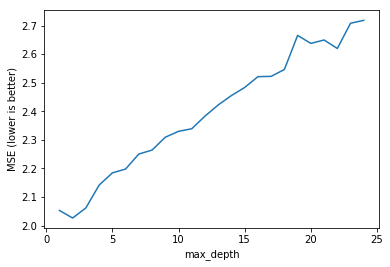

In [177]:
# Plot max_depth (x-axis) versus MSE (y-axis).
plt.plot(max_depth_range, MSE_scores);
plt.xlabel('max_depth');
plt.ylabel('MSE (lower is better)');

In [178]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(MSE_scores, max_depth_range))[0]

(2.0265651001575113, 2)

In [179]:
# max_depth=2 was best... not great... fit tree anyway. MSE 2.027
treereg = tree.DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [181]:
# Compute feature importances. Helpful in later variable selection!!!!
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False).head(3)

,feature,importance
57,num58,0.467471
4,num5,0.462357
47,num48,0.070172
